In [20]:
#pip install openai==0.28
import openai
import requests
from PIL import Image
from io import BytesIO
from gtts import gTTS
import os

In [21]:
# Set up OpenAI API Key
openai.api_key = "Your Open AI API Key"

# Function to generate image from text using OpenAI's API
def generate_image(prompt):
    response = openai.Image.create(
        prompt=prompt,
        n=1,
        size="1024x1024"
    )

    # Image URL retrieval
    image_url = response['data'][0]['url']
    image_data = requests.get(image_url).content
    image = Image.open(BytesIO(image_data))
    return image



In [22]:
# Function to save image locally
def save_image(image, filename):
    image.save(filename)


In [23]:
# Function for text-to-speech narration using gTTS
def narrate_text_with_gtts(text, filename="story.mp3"):
    tts = gTTS(text=text, lang='en')
    tts.save(filename)
    os.system(f"start {filename}")

In [24]:
# Function to create the illustrated storybook
def create_storybook(story_data):
    story_title = story_data.get('title', 'Storybook')
    chapters = story_data.get('chapters', [])

    for idx, chapter in enumerate(chapters):
        print(f"Generating illustration for chapter {idx + 1}: {chapter['title']}")
        # Generate Image for each chapter
        image = generate_image(chapter['description'])

        # Save image locally with chapter title
        image_filename = f"chapter_{idx + 1}_image.png"
        save_image(image, image_filename)

        # Narrate the story
        narrate_text_with_gtts(chapter['text'], f"chapter_{idx + 1}_narration.mp3")

        print(f"Chapter {idx + 1} illustration saved as {image_filename} and narration saved as chapter_{idx + 1}_narration.mp3")

    print(f"{story_title} has been successfully generated!")

In [25]:
# Sample Story Data (This should ideally come from a database or user input)
story_data = {
    'title': 'The Magical Forest Adventure',
    'chapters': [
        {
            'title': 'Chapter 1: The Enchanted Tree',
            'description': 'An enchanted tree in a mystical forest with glowing leaves, fairies, and a magical aura.',
            'text': 'Once upon a time, in a magical forest, there stood a glowing enchanted tree. The fairies danced around it, and the air was filled with magic.'
        },
        {
            'title': 'Chapter 2: The Talking Rabbit',
            'description': 'A cute rabbit in the forest, standing near a big mushroom with a speech bubble, ready to talk.',
            'text': 'In the heart of the forest, a little rabbit appeared, wearing a small vest. It hopped over to the adventurers and said, "Welcome to the magical world!"'
        }
        # You can add more chapters here
    ]
}

In [26]:

# Generate the illustrated storybook
create_storybook(story_data)

Generating illustration for chapter 1: Chapter 1: The Enchanted Tree
Chapter 1 illustration saved as chapter_1_image.png and narration saved as chapter_1_narration.mp3
Generating illustration for chapter 2: Chapter 2: The Talking Rabbit
Chapter 2 illustration saved as chapter_2_image.png and narration saved as chapter_2_narration.mp3
The Magical Forest Adventure has been successfully generated!


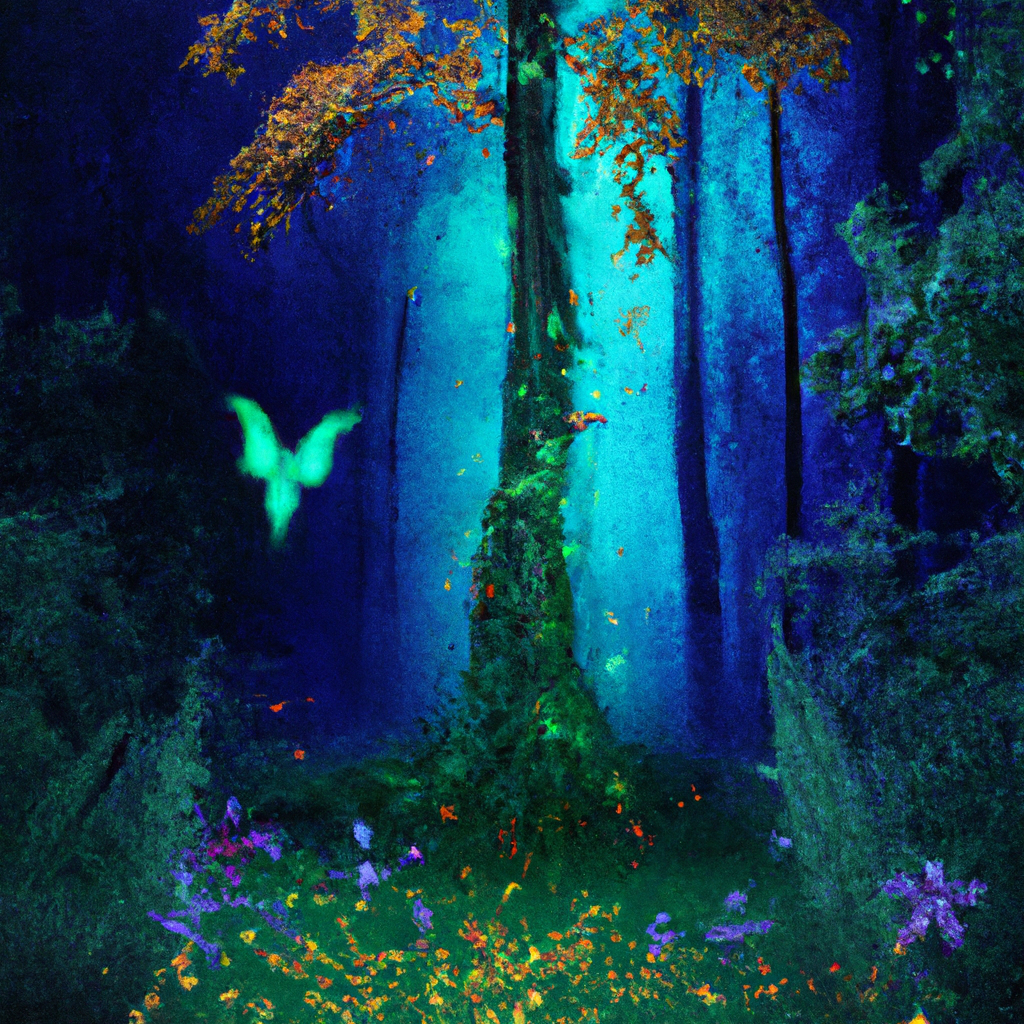

In [27]:
from IPython.display import Image
Image(filename='/content/chapter_1_image.png')
